# Practice Project - Part 1: Understanding Trends and Plotting

Resource: IBM Data Visualization Course - Week 5, Practice Project Part 1

**Analyzing wildfire activities in Australia**
__Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
    </li>
    <li>
        <a href="#Dataset">Dataset</a>
    </li>
    <li><a href="#Importing Dataset">Importing Dataset</a></li>
    <li><a href="#Practice Tasks">Practice Tasks</a></li>
</ol>


__Objectives:__
After completing this lab you will be able to:

* Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts

## Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
%matplotlib inline

## Dataset




**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


## Import Data

In [7]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

df = pd.read_csv(url)
df.head(2)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R


In [10]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(26406, 10)
Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')
Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object


In [15]:
# lets convert the date column data type to "Date" type and extract year and month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

df.head(3)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.4000,78.333333,3.214550,10.333333,3,R,2005,1


In [16]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

## Practice Task: 

### Task -01 : 
**Let's try to understand the change in average estimated fire area over time.**\
(use pandas to plot)

#### EDA

In [17]:
df.head(3)

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.4000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.3625,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.4000,78.333333,3.214550,10.333333,3,R,2005,1


In [34]:
fire_time_yearly = df.groupby('Year')['Estimated_fire_area'].mean().reset_index()
fire_time_yearly.head(3)


,Year,Estimated_fire_area
0,2005,92.770501
1,2006,176.289434
2,2007,153.112464


In [26]:
fire_time_monthly = df.groupby('Month',)['Estimated_fire_area'].mean().reset_index()
fire_time_monthly.head()

,Month,Estimated_fire_area
0,1,101.255540
1,2,58.493869
2,3,38.245106
3,4,77.498305
4,5,87.579229


#### Plotting

<Figure size 1200x600 with 0 Axes>

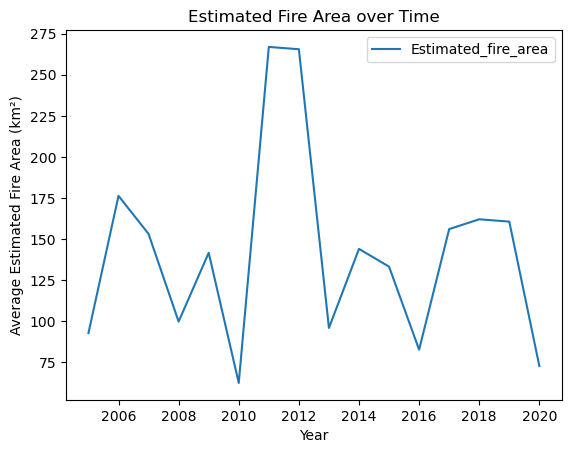

In [33]:
plt.figure(figsize=(12, 6))

fire_time_yearly.plot(x='Year',y='Estimated_fire_area')

plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')

plt.show()

### Task - 1.2:
**You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.**

#### EDA

In [50]:
fire_time_year_monthly = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
fire_time_year_monthly


Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

#### Plotting

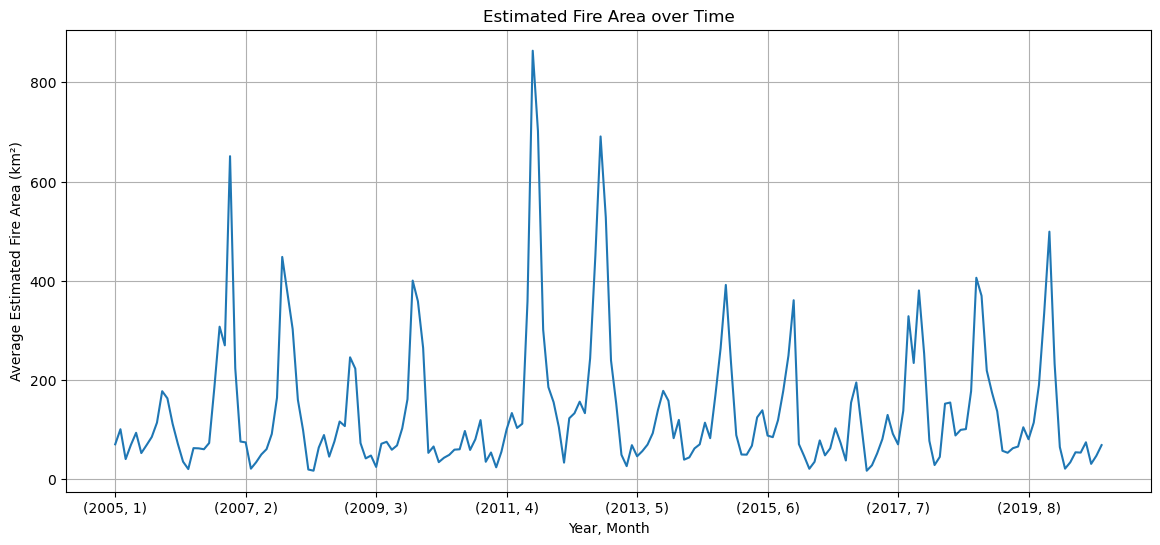

In [57]:
plt.figure(figsize=(14, 6))

fire_time_year_monthly.plot(x=fire_time_year_monthly.index, y=fire_time_year_monthly.values)

plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.grid()

plt.show()


### Task - 1.3:
**Let's have an insight on the distribution of mean estimated fire brightness across the regions**

Hint: use the functionality of seaborn to develop a barplot\
before starting with the plot, why not know the regions mentioned in the dataset?.\
Make use of unique() to identify the regions in the dataset (apply it on series only)

In [62]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [61]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

**Using Pandas**

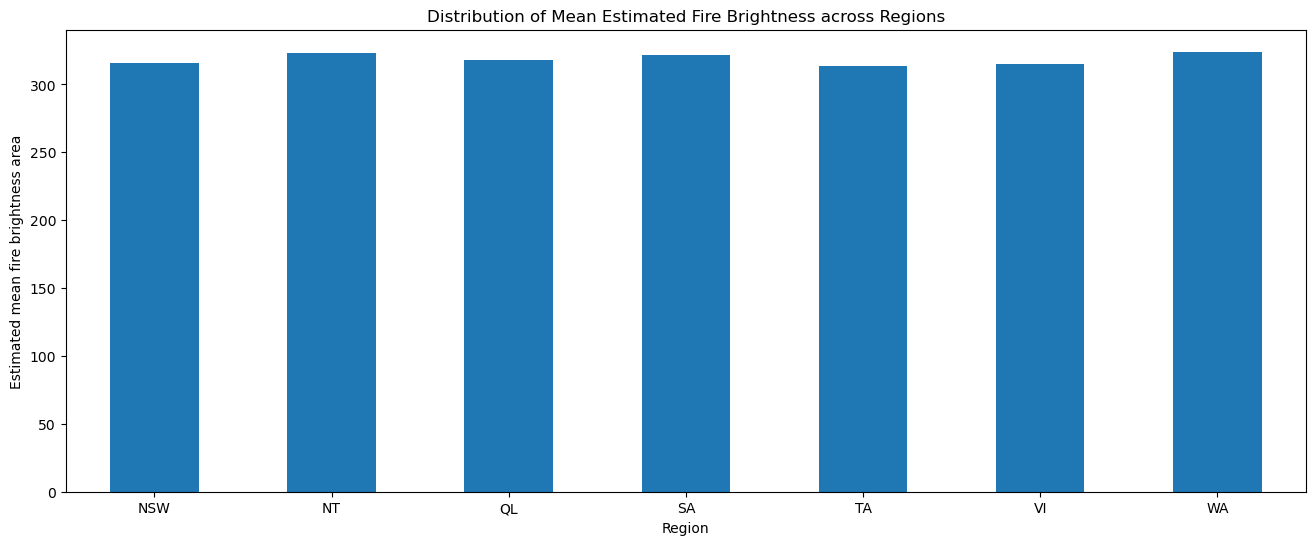

In [98]:
# EDA
df_mefbR = df.groupby('Region')['Mean_estimated_fire_brightness'].mean() # series data


#plot
plt.figure(figsize=(16,6))
df_mefbR.plot(kind='bar',x='Region',y='Mean_estimated_fire_brightness',rot=360)  # Replace 'column_name' with your actual column name

#.barplot(x='Region',y='Mean_estimated_fire_brightnes')

plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.xlabel('Region')
plt.ylabel('Estimated mean fire brightness area')
plt.grid(False)
plt.show()

**Using Seaborn**

<Figure size 1000x600 with 0 Axes>

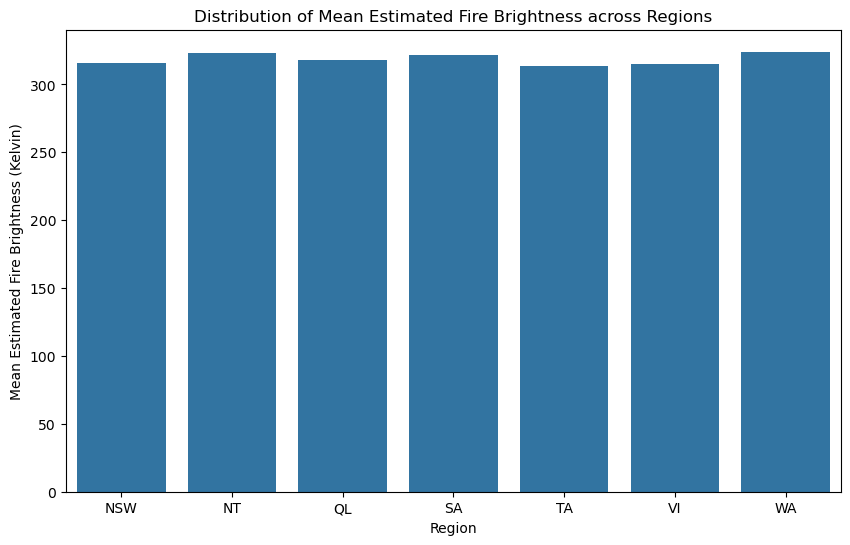

In [96]:
df_mefbR2 = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df_mefbR2, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

### Task - 1.4: 
**Let's find the portion of count of pixels for presumed vegetation fires vary across regions.**

* we will develop a pie chart for this

### Task - 1.5:

### Task - 1.6:

### Task - 1.7

### Task - 1.8

### Task - 1.9: